# Fake News Detection
`Author` [Muhammad Abdullah](https://www.kaggle.com/abdullahlmao)\
`Date` 2022-01-01\
`Dataset` [Kaggle](https://www.kaggle.com/datasets/rajatkumar30/fake-news)

Fake news or hoax news is false or misleading information presented as news. Fake news often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue.

This dataset is having Both Fake and Real news.

The columns present in the dataset are:-

1) `Title` -> Title of the News

2) `Text` -> Text or Content of the News

3) `Label` -> Labelling the news as Fake or Real

In [9]:
# Step1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string
from sklearn.feature_extraction import text

In [10]:
# Step2: Load the dataset
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
df['text']

0       daniel greenfield a shillman journalism fellow...
1       google pinterest digg linkedin reddit stumbleu...
2       us secretary of state john f kerry said monday...
3       — kaydee king kaydeeking november 9 2016 the l...
4       its primary day in new york and frontrunners h...
                              ...                        
6330    the state department told the republican natio...
6331    the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332     antitrump protesters are tools of the oligarc...
6333    addis ababa ethiopia —president obama convened...
6334    jeb bush is suddenly attacking trump heres why...
Name: text, Length: 6335, dtype: object

In [11]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [13]:
def preprocessing_text(text):

    #Convert to lowercase
    text = text.lower()

    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

In [14]:
df['text'] = df['text'].apply(preprocessing_text)

In [15]:
stop_words = text.ENGLISH_STOP_WORDS

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['text'])

In [19]:
# Enocde labels: 1 = Real, 0= Fake
y = df['label'].apply(lambda x:1 if x == 'FAKE' else 0)

In [20]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model building - PassiveAgressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [22]:
# Prediction and evaluation
y_pred = pac.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score * 100: .2f}%")

Accuracy Score:  94.40%


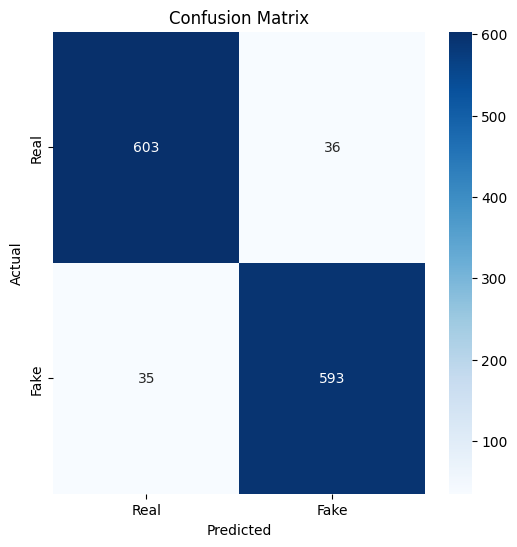

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
def predict_news(news):
    news = preprocessing_text(news)
    news_vectorized = tfidf_vectorizer.transform([news])
    prediction = pac.predict(news_vectorized)
    # return prediction
    return 'FAKE' if prediction[0] == 0 else 'REAL'
# Test the function
print(predict_news("Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word â€œunprecedentedâ€ has been thrown around so often this election that it ought to be retired. But itâ€™s still unprecedented for the nominee of a major political party to go war with the FBI. 
But thatâ€™s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillaryâ€™s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillaryâ€™s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldnâ€™t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBIâ€™s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after Hillary. And the FBIâ€™s credibility is being attacked by the media and the Democrats to preemptively head off the results of the investigation of the Clinton Foundation and Hillary Clinton. 
The covert struggle between FBI agents and Obamaâ€™s DOJ people has gone explosively public. 
The New York Times has compared Comey to J. Edgar Hoover. Its bizarre headline, â€œJames Comey Role Recalls Hooverâ€™s FBI, Fairly or Notâ€ practically admits up front that itâ€™s spouting nonsense. The Boston Globe has published a column calling for Comeyâ€™s resignation. Not to be outdone, Time has an editorial claiming that the scandal is really an attack on all women. 
James Carville appeared on MSNBC to remind everyone that he was still alive and insane. He accused Comey of coordinating with House Republicans and the KGB. And you thought the â€œvast right wing conspiracyâ€ was a stretch. 
Countless media stories charge Comey with violating procedure. Do you know whatâ€™s a procedural violation? Emailing classified information stored on your bathroom server. 
Senator Harry Reid has sent Comey a letter accusing him of violating the Hatch Act. The Hatch Act is a nice idea that has as much relevance in the age of Obama as the Tenth Amendment. But the cable news spectrum quickly filled with media hacks glancing at the Wikipedia article on the Hatch Act under the table while accusing the FBI director of one of the most awkward conspiracies against Hillary ever. 
If James Comey is really out to hurt Hillary, he picked one hell of a strange way to do it. 
Not too long ago Democrats were breathing a sigh of relief when he gave Hillary Clinton a pass in a prominent public statement. If he really were out to elect Trump by keeping the email scandal going, why did he trash the investigation? Was he on the payroll of House Republicans and the KGB back then and playing it coy or was it a sudden development where Vladimir Putin and Paul Ryan talked him into taking a look at Anthony Weinerâ€™s computer? 
Either Comey is the most cunning FBI director that ever lived or heâ€™s just awkwardly trying to navigate a political mess that has trapped him between a DOJ leadership whose political futures are tied to Hillaryâ€™s victory and his own bureau whose apolitical agents just want to be allowed to do their jobs. 
The only truly mysterious thing is why Hillary and her associates decided to go to war with a respected Federal agency. Most Americans like the FBI while Hillary Clinton enjoys a 60% unfavorable rating. 
And itâ€™s an interesting question. 
Hillaryâ€™s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI. 
Pretending that nothing was wrong was a bad strategy, but it was a better one that picking a fight with the FBI while lunatic Clinton associates try to claim that the FBI is really the KGB. 
There are two possible explanations. 
Hillary Clinton might be arrogant enough to lash out at the FBI now that she believes that victory is near. The same kind of hubris that led her to plan her victory fireworks display could lead her to declare a war on the FBI for irritating her during the final miles of her campaign. 
But the other explanation is that her people panicked. 
Going to war with the FBI is not the behavior of a smart and focused presidential campaign. Itâ€™s an act of desperation. When a presidential candidate decides that her only option is to try and destroy the credibility of the FBI, thatâ€™s not hubris, itâ€™s fear of what the FBI might be about to reveal about her. 
During the original FBI investigation, Hillary Clinton was confident that she could ride it out. And she had good reason for believing that. But that Hillary Clinton is gone. In her place is a paranoid wreck. Within a short space of time the â€œpositiveâ€ Clinton campaign promising to unite the country has been replaced by a desperate and flailing operation that has focused all its energy on fighting the FBI. 
Thereâ€™s only one reason for such bizarre behavior. 
The Clinton campaign has decided that an FBI investigation of the latest batch of emails poses a threat to its survival. And so itâ€™s gone all in on fighting the FBI. Itâ€™s an unprecedented step born of fear. Itâ€™s hard to know whether that fear is justified. But the existence of that fear already tells us a whole lot. 
Clinton loyalists rigged the old investigation. They knew the outcome ahead of time as well as they knew the debate questions. Now suddenly they are no longer in control. And they are afraid. 
You can smell the fear. 
The FBI has wiretaps from the investigation of the Clinton Foundation. Itâ€™s finding new emails all the time. And Clintonworld panicked. The spinmeisters of Clintonworld have claimed that the email scandal is just so much smoke without fire. All thatâ€™s here is the appearance of impropriety without any of the substance. But this isnâ€™t how you react to smoke. Itâ€™s how you respond to a fire. 
The misguided assault on the FBI tells us that Hillary Clinton and her allies are afraid of a revelation bigger than the fundamental illegality of her email setup. The email setup was a preemptive cover up. The Clinton campaign has panicked badly out of the belief, right or wrong, that whatever crime the illegal setup was meant to cover up is at risk of being exposed. 
The Clintons have weathered countless scandals over the years. Whatever they are protecting this time around is bigger than the usual corruption, bribery, sexual assaults and abuses of power that have followed them around throughout the years. This is bigger and more damaging than any of the allegations that have already come out. And they donâ€™t want FBI investigators anywhere near it. 
The campaign against Comey is pure intimidation. Itâ€™s also a warning. Any senior FBI people who value their careers are being warned to stay away. The Democrats are closing ranks around their nominee against the FBI. Itâ€™s an ugly and unprecedented scene. It may also be their last stand. 
Hillary Clinton has awkwardly wound her way through numerous scandals in just this election cycle. But sheâ€™s never shown fear or desperation before. Now that has changed. Whatever she is afraid of, it lies buried in her emails with Huma Abedin. And it can bring her down like nothing else has.  "))


REAL
